In [4]:
import matplotlib.pyplot as plt
import scipy.io as sio 
import os
import scipy.signal as signal

dir = './DATASET_FNUSA_test/'
files = [os.path.join(dir, file_name) for file_name in os.listdir(dir)]
# data_set = sio.loadmat('./DATASET_FNUSA_test/y000000.mat')['data']
# data_set1 = sio.loadmat('./DATASET_FNUSA_test/y000001.mat')['data']
data_set = []
for file_ in files:
    if file_[-3:] == 'mat':
        data_set.append(sio.loadmat(file_)['data'][0, :])
data_set


[array([-0.33575246, -0.38803262, -0.42910987, ..., -1.43737   ,
        -1.439237  , -1.439237  ], dtype=float32),
 array([-0.05928232, -0.02298436,  0.01149871, ..., -2.6055844 ,
        -2.5674715 , -2.522099  ], dtype=float32),
 array([-0.5341936 , -0.55526006, -0.56579334, ..., -1.2644995 ,
        -1.3505211 , -1.4207429 ], dtype=float32),
 array([0.5398081 , 0.54141897, 0.5430299 , ..., 2.3568993 , 2.3649538 ,
        2.3649538 ], dtype=float32),
 array([-0.8715622 , -0.8513523 , -0.8340295 , ..., -0.22484541,
        -0.23206322, -0.24361174], dtype=float32),
 array([0.9293642 , 0.9594777 , 1.006321  , ..., 0.48100758, 0.5261778 ,
        0.5713481 ], dtype=float32),
 array([-4.29374   , -4.3032627 , -4.31469   , ..., -0.27317983,
        -0.31698507, -0.35507658], dtype=float32),
 array([-1.6990389 , -1.7827353 , -1.839287  , ...,  0.43409055,
         0.41146988,  0.39789748], dtype=float32),
 array([-1.4696777, -1.428312 , -1.384648 , ..., -1.5960732, -1.6374389,
        -1.

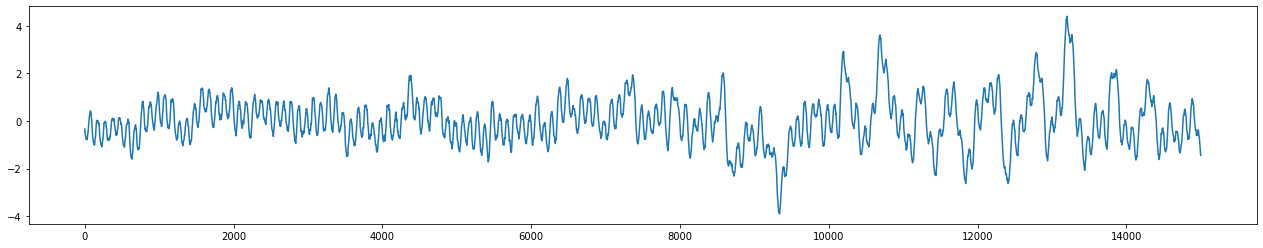

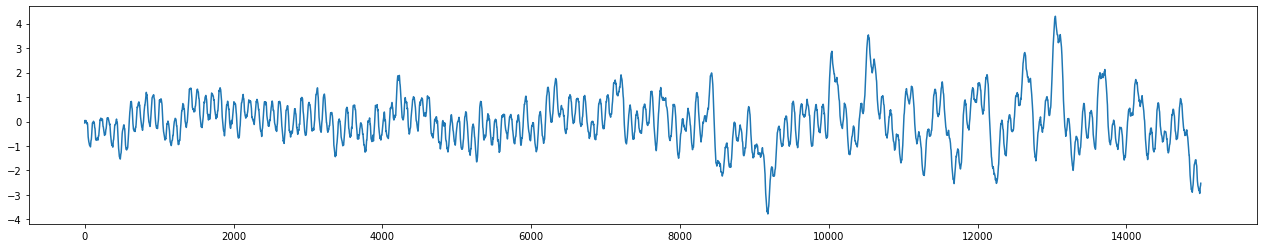

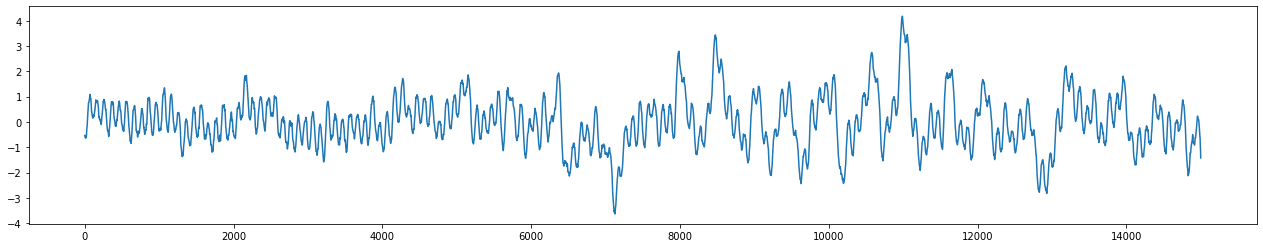

In [5]:
for data in data_set[:3]:
    plt.figure(figsize=(22,4 ))
    plt.plot(data)
    plt.show()    

(513, 116)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


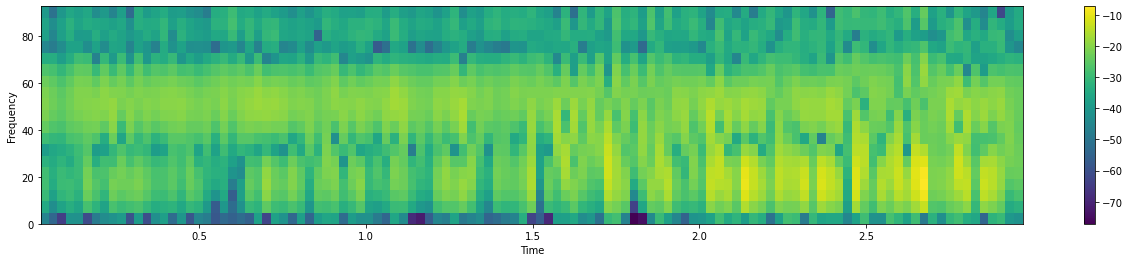

In [65]:
import numpy as np

#FFT
for data in data_set[:1]:
    NFFF = 20
    f, t, spectro_data = signal.spectrogram(data, fs=5000, nperseg=256, noverlap=128, nfft=1024)
    print(spectro_data.shape)
    spectro_data = spectro_data[:NFFF, :]
    plt.figure(figsize=(22,4 ))
    plt.pcolormesh(t, f[:NFFF], 10*np.log10(spectro_data))
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.show()   



In [25]:
import scipy.stats as stats
# 10*np.log10(spectro_data)
# stats.zscore(spectro_data,axis=1)
spectro_data

array([[2.68874519e-05, 3.91124922e-06, 3.53237851e-07, ...,
        1.01273807e-04, 6.89884619e-05, 4.29635926e-04],
       [3.25174798e-04, 5.03604024e-05, 2.21088150e-04, ...,
        3.55020864e-04, 5.62410336e-04, 1.02582504e-03],
       [9.58870864e-04, 1.91427782e-04, 7.15629663e-04, ...,
        9.71269736e-04, 1.72483118e-03, 1.43821235e-03],
       ...,
       [2.45257450e-08, 8.17271972e-10, 1.33561491e-08, ...,
        2.26840555e-08, 4.43905934e-09, 1.21407737e-08],
       [1.80257622e-08, 1.38693657e-09, 8.80533424e-09, ...,
        1.28711832e-08, 1.90781213e-09, 1.69250018e-08],
       [1.40518095e-08, 2.41895393e-09, 5.69708725e-09, ...,
        6.74744172e-09, 5.65019409e-09, 2.41616895e-08]], dtype=float32)

In [42]:
f[:20]

array([ 0.       ,  4.8828125,  9.765625 , 14.6484375, 19.53125  ,
       24.4140625, 29.296875 , 34.1796875, 39.0625   , 43.9453125,
       48.828125 , 53.7109375, 58.59375  , 63.4765625, 68.359375 ,
       73.2421875, 78.125    , 83.0078125, 87.890625 , 92.7734375])

(513, 119)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


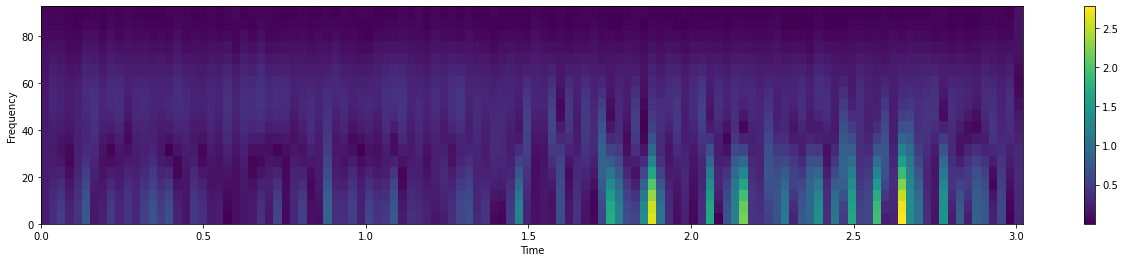

In [66]:
#STFT
for data in data_set[:1]:
    NFFF = 20
    f, t, zxx = signal.stft(data, fs=5000, nperseg=256, noverlap=128, nfft=1024)
    print(zxx.shape)
    zxx = zxx[:NFFF, :]
    plt.figure(figsize=(22,4 ))
    plt.pcolormesh(t, f[:NFFF], np.abs(zxx))
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.show()   

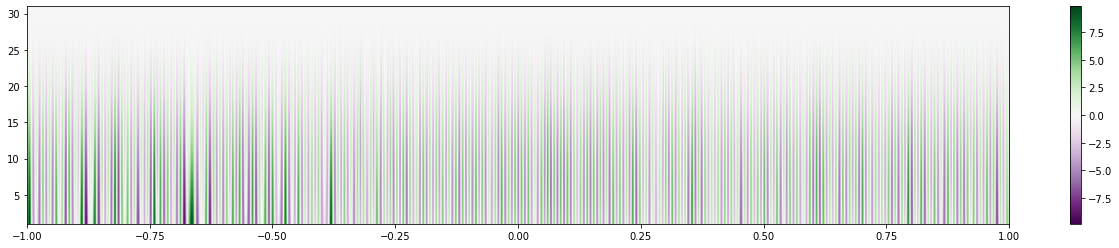

In [76]:
#Wavelet
wavelet_function = [signal.ricker, signal.morlet, signal.morlet2]
widths = [np.arange(1, 31)]
# widths = [np.arange(1, 31), np.arange(1, 2, 0.1), np.arange(1, 100)]
for index, data in enumerate(data_set[5:6]):
    # for j in range(3):
        cwtmatr = signal.cwt(data, wavelet_function[index], widths=widths[0])
          
        plt.figure(figsize=(22,4 ))
        plt.imshow(cwtmatr, extent=[-1,1,1,31], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
        # plt.xlabel('Time')
        # plt.ylabel('Frequency')
        plt.colorbar()
        plt.show()   

In [47]:
for i in range(3):
    print(i)

0
1
2
